# Universidad de las Américas
**Materia:** Inteligencia Artificial I  
**Estudiante:** Gorky Palacios Mutis

## Actividad: Aplicación práctica Decision Tree

### Descripción
Desarrollo de un programa en Python para aplicar Clasificación Decision Tree sobre el dataset "Students Social Media Addiction".

# Clasificación Decision Tree: Adicción a Redes Sociales en Estudiantes

Este notebook implementa un modelo de clasificación Decision Tree para predecir si un estudiante es adicto a las redes sociales en base a su puntuación de adicción y otras variables relevantes del dataset.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [3]:
# Cargar el dataset
students = pd.read_csv('Students Social Media Addiction.csv')

# Crear la columna Is_Addicted: 1 si Addicted_Score > 7, 0 en caso contrario
students['Is_Addicted'] = (students['Addicted_Score'] > 7).astype(int)

# Mostrar las primeras filas para verificar
print(students[['Addicted_Score', 'Is_Addicted']].head())

   Addicted_Score  Is_Addicted
0               8            1
1               3            0
2               9            1
3               4            0
4               7            0


## Selección de variables para el modelo

Se utilizarán las variables numéricas más relevantes: Edad y Horas promedio de uso diario.

In [4]:
# Selección de variables numéricas relevantes (solo dos para visualización 2D)
X = students[['Age', 'Avg_Daily_Usage_Hours']].values
y = students['Is_Addicted'].values

print("Primeras filas de X:")
print(X[:5])
print("Primeras etiquetas de y:")
print(y[:5])

Primeras filas de X:
[[19.   5.2]
 [22.   2.1]
 [20.   6. ]
 [18.   3. ]
 [21.   4.5]]
Primeras etiquetas de y:
[1 0 1 0 0]


In [5]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Primeras filas de X_train:")
print(X_train[:5])
print("Primeras etiquetas de y_train:")
print(y_train[:5])
print("Primeras filas de X_test:")
print(X_test[:5])
print("Primeras etiquetas de y_test:")
print(y_test[:5])

Primeras filas de X_train:
[[22.   3.3]
 [21.   4.4]
 [21.   4.6]
 [22.   4.7]
 [22.   5. ]]
Primeras etiquetas de y_train:
[0 0 0 0 0]
Primeras filas de X_test:
[[22.   4.4]
 [19.   4. ]
 [19.   3.3]
 [20.   4.9]
 [23.   6.8]]
Primeras etiquetas de y_test:
[0 0 0 0 1]


In [6]:
# Escalado de características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Primeras filas de X_train escalado:")
print(X_train[:5])
print("Primeras filas de X_test escalado:")
print(X_test[:5])

Primeras filas de X_train escalado:
[[ 1.00179646 -1.34500071]
 [ 0.27918918 -0.44853937]
 [ 0.27918918 -0.2855464 ]
 [ 1.00179646 -0.20404991]
 [ 1.00179646  0.04043954]]
Primeras filas de X_test escalado:
[[ 1.00179646 -0.44853937]
 [-1.16602539 -0.77452531]
 [-1.16602539 -1.34500071]
 [-0.44341811 -0.04105694]
 [ 1.72440375  1.50737628]]


In [7]:
# Entrenamiento del modelo Decision Tree
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# Predicción sobre el conjunto de prueba
y_pred = classifier.predict(X_test)
print("Predicciones vs Realidad:")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Predicciones vs Realidad:
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 

In [12]:
# Matriz de confusión y precisión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:")
print(accuracy)

# Otras métricas de desempeño
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("F1-Score:", f1)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# AUC-ROC (solo si el modelo puede predecir probabilidades)
if hasattr(classifier, "predict_proba"):
    y_proba = classifier.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    print("AUC-ROC:", auc)

Matriz de Confusión:
[[125   9]
 [ 12  31]]
Precisión del modelo:
0.8813559322033898
Precisión (Precision): 0.775
Sensibilidad (Recall): 0.7209302325581395
F1-Score: 0.7469879518072289

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       134
           1       0.78      0.72      0.75        43

    accuracy                           0.88       177
   macro avg       0.84      0.83      0.83       177
weighted avg       0.88      0.88      0.88       177

AUC-ROC: 0.8346060395695939


C:\Users\Gorky\AppData\Local\Temp\ipykernel_1364\1635569687.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


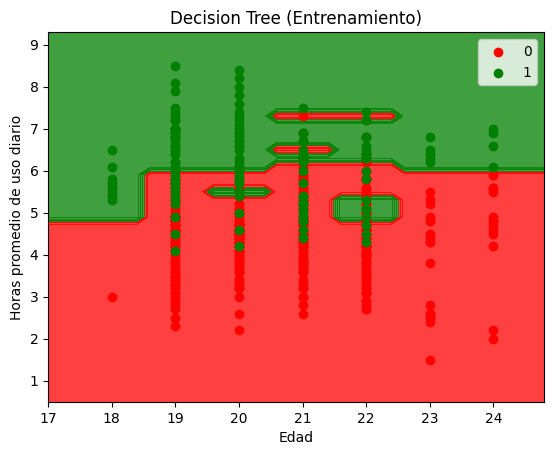

In [13]:
# Visualización de la frontera de decisión (conjunto de entrenamiento)
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Horas promedio de uso diario')
plt.legend()
plt.show()

C:\Users\Gorky\AppData\Local\Temp\ipykernel_1364\2731455997.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


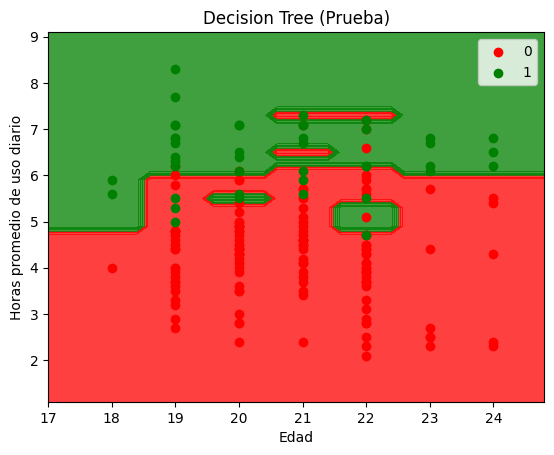

In [14]:
# Visualización de la frontera de decisión (conjunto de prueba)
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Horas promedio de uso diario')
plt.legend()
plt.show()

# Análisis de Resultados

A continuación se analizan los resultados obtenidos por el modelo Decision Tree aplicado a la predicción de adicción a redes sociales en estudiantes:

**Matriz de Confusión:**
- [[125   9]
   [ 12  31]]
- El modelo clasificó correctamente a 125 estudiantes no adictos (verdaderos negativos) y a 31 adictos (verdaderos positivos).
- Hubo 9 falsos positivos (no adictos clasificados como adictos) y 12 falsos negativos (adictos clasificados como no adictos).

**Precisión global (accuracy):**
- 0.88 (88.1%). El modelo acierta en casi 9 de cada 10 casos.

**Precisión (precision):**
- 0.775. De todos los estudiantes que el modelo predijo como adictos, el 77.5% realmente lo son.

**Sensibilidad (recall):**
- 0.72. El modelo identifica correctamente al 72% de los estudiantes que realmente son adictos.

**F1-Score:**
- 0.75. Es un balance entre precisión y sensibilidad, útil cuando hay cierto desbalance de clases.

**Reporte de Clasificación:**
- Para la clase 0 (no adicto): precisión 0.91, recall 0.93, f1-score 0.92.
- Para la clase 1 (adicto): precisión 0.78, recall 0.72, f1-score 0.75.
- El modelo es más efectivo identificando no adictos que adictos, pero aún así tiene buen desempeño en ambas clases.

**AUC-ROC:**
- 0.83. Indica una buena capacidad del modelo para distinguir entre adictos y no adictos. Un valor cercano a 1 es ideal.

**Conclusión:**
- El modelo Decision Tree muestra un desempeño sólido, especialmente en la identificación de estudiantes no adictos.
- La sensibilidad para la clase adicto podría mejorarse, por ejemplo, ajustando hiperparámetros, usando técnicas de balanceo de clases o probando otros modelos.
- El uso de varias métricas permite una evaluación más completa que solo la precisión global.
- La frontera de decisión visualizada ayuda a entender cómo el modelo separa ambas clases en función de la edad y las horas promedio de uso diario.